In [1]:
import pandas as pd
df_ini = pd.read_csv("data/olympic_medals.csv")

In [2]:
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Transforming Dataset
data = {
    'Year': [],
    'Category': [],
    'Country': [],
    'Medals': []
}

got = set()
for i in range(len(df_ini)):
    year = df_ini["slug_game"][i]
    category = df_ini["discipline_title"][i]
    country = df_ini["participant_title"][i]
    if(int(year[-4:]) < 1992):
        continue
    hash = str(year)+str(category)+str(country)
    if hash in got:
        continue
    got.add(hash)
    
    medals = len(
        df_ini.loc[
            (df_ini["slug_game"] == year) & 
            (df_ini["discipline_title"] == category) & 
            (df_ini["participant_title"] == country)
        ]
    )
    data["Year"].append(year)
    data["Category"].append(category)
    data["Country"].append(country)
    data["Medals"].append(medals)
    
df = pd.DataFrame(data)

In [12]:
df

df_total = df.groupby(by=["Country", "Category"]).sum()

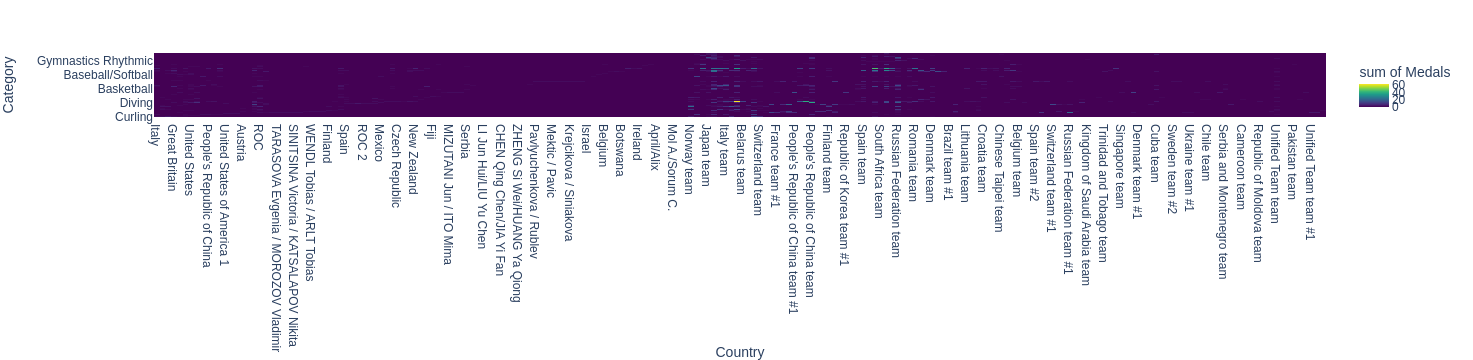

In [18]:
fig = px.density_heatmap(df, x='Country', y='Category',
                         z='Medals',
                         color_continuous_scale='Viridis')
fig

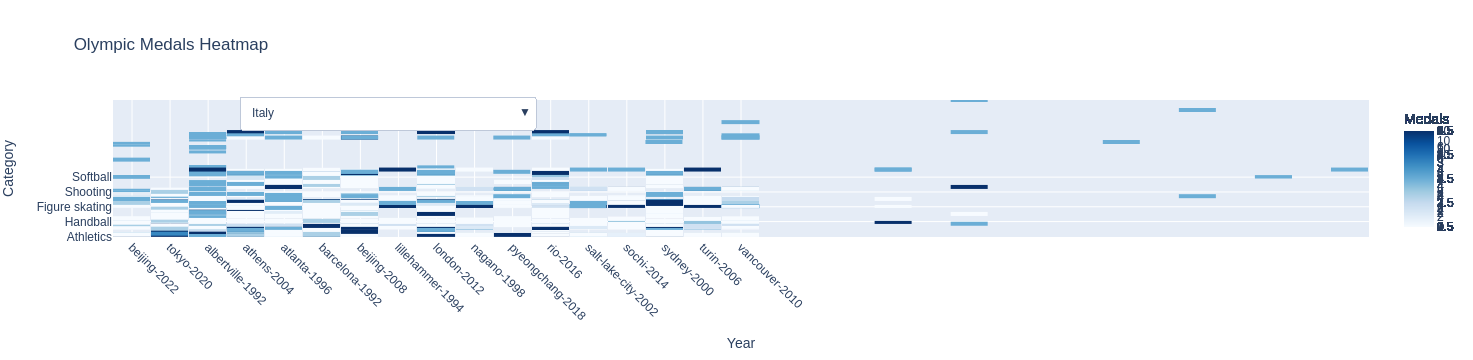

In [40]:
# Create a list of available countries
countries = df['Country'].unique()

# Initialize figure
fig = go.Figure()

# Iterate over countries
for country in countries:
    df_filtered = df[df['Country'] == country]
    heatmap_data = pd.pivot_table(df_filtered, values='Medals', index='Category', columns='Year', aggfunc='sum')
    
    fig.add_trace(go.Heatmap(
        x=heatmap_data.columns,
        y=heatmap_data.index,
        z=heatmap_data.values,
        colorscale='Blues',
        colorbar=dict(title='Medals'),
        hovertemplate='<b>Category</b>: %{y}<br><b>Year</b>: %{x}<br><b>Medals</b>: %{z}<extra></extra>',
        name=country,
        text=heatmap_data.values,
        xgap=1,
        ygap=5,
    ))

# Add dropdown menu
fig.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            buttons=[
                dict(
                    label=country,
                    method="update",
                    args=[{"visible": [country == trace.name for trace in fig.data]}],
                    args2=[{"title": f'Olympic Medals Heatmap - {country}'}],
                )
                for country in countries
            ],
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ],
)

# Set layout
fig.update_layout(
    title='Olympic Medals Heatmap',
    xaxis=dict(title='Year', tickmode='array', tickvals=df['Year'].unique(), ticktext=df['Year'].unique(), tickangle=45),
    yaxis=dict(title='Category'),
)

# Show the plot
fig.show()

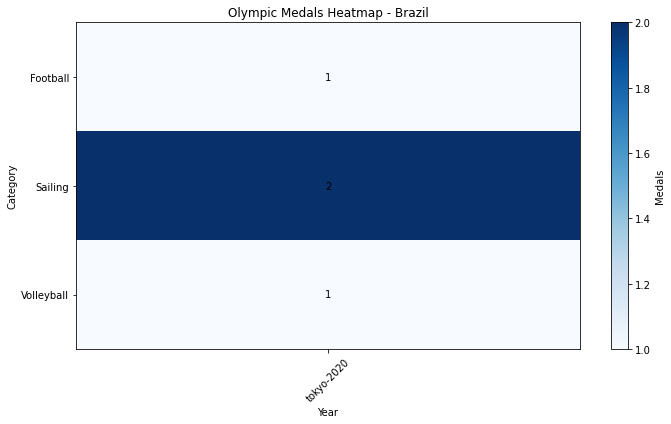

In [33]:
import matplotlib.pyplot as plt
def generate_heatmap(country):
    # Filter data for the given country
    df_filtered = df[df['Country'] == country]

    # Create pivot table for heatmap data
    heatmap_data = pd.pivot_table(df_filtered, values='Medals', index='Category', columns='Year', aggfunc='sum')

    # Set up the heatmap plot
    plt.figure(figsize=(10, 6))
    plt.imshow(heatmap_data, cmap='Blues', aspect='auto')

    # Customize the plot
    plt.title(f'Olympic Medals Heatmap - {country}')
    plt.xlabel('Year')
    plt.ylabel('Category')
    plt.colorbar(label='Medals')
    plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns, rotation=45)
    plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)

    # Show the values in each cell
    for i in range(len(heatmap_data.index)):
        for j in range(len(heatmap_data.columns)):
            plt.text(j, i, heatmap_data.values[i, j], ha='center', va='center')

    # Display the heatmap
    plt.tight_layout()
    plt.show()

# Example usage
generate_heatmap('Brazil')